In [1]:
from gbdxtools.ipe.image import IpeImage
from gbdxtools import Interface
gbdx = Interface()

import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

def plot_pan(data):
    f, ax1 = plt.subplots(1, figsize=(20,10))
    ax1.axis('off')
    plt.imshow(data[0,:,:], cmap="Greys_r")
    plt.show()

def plot(data, stretch=[2,98]):
    f, ax1 = plt.subplots(1, figsize=(20,10))
    ax1.axis('off')
    data = data.astype(np.float32)
    data = np.rollaxis(data, 0, 3)
    lims = np.percentile(data,stretch,axis=(0,1))
    for x in xrange(len(data[0,0,:])):
        top = lims[:,x][1]
        bottom = lims[:,x][0]
        data[:,:,x] = (data[:,:,x]-bottom)/float(top-bottom)
    data = np.clip(data,0,1)
    plt.imshow(data,interpolation='nearest')   
    plt.show(block=False)

In [3]:
# Provide virtual access to the full Idaho Image 
img = IpeImage('45784ada-cf81-4bbd-b4bd-d95c7a3bb7bb')
rgb = img[[4,2,1], ...]
rgb.shape

(3, 7168, 12032)

In [4]:
# subset the image by an AOI
aoi = img.aoi([-105.26801347732545,40.00817393602954,-105.26406526565553,40.01108296862613])
print aoi.shape

(8, 256, 256)


In [5]:
sm_rgb = aoi[[4,2,1], ...]
sm_rgb.shape

(3, 256, 256)

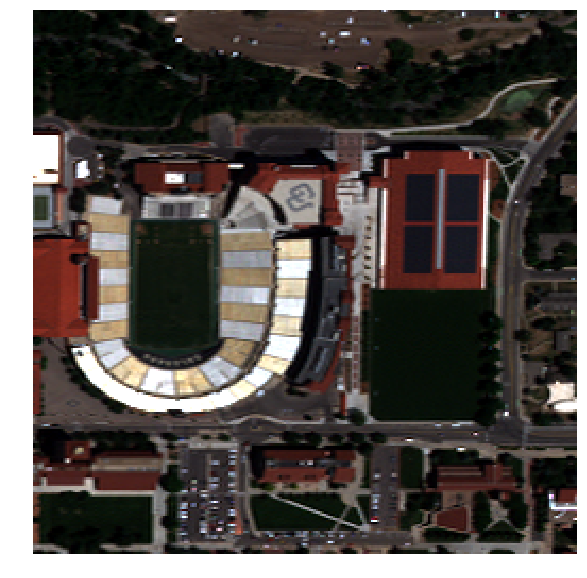

In [6]:
# shouldnt have to call compute here 
plot(sm_rgb.compute())

In [7]:
tif = aoi.geotiff('wat.tif')
!gdalinfo wat.tif

fetching data
Driver: GTiff/GeoTIFF
Files: wat.tif
Size is 11853, 6973
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-105.389753889999994,40.016241180000002)
Pixel Size = (0.000017597915918,-0.000017597915918)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left  (-105.3897539,  40.0162412) (105d23'23.11"W, 40d 0'58.47"N)
Lower Left  (-105.3897539,  39.8935309) (105d23'23.11"W, 39d53'36.71"N)
Upper Right (-105.1811658,  40.0162412) (105d10'52.20"W, 40d 0'58.47"N)
Lower Right (-105.1811658,  39.8935309) (105d10'52.20"W, 39d53'36.71"N)
Center      (-105.2854598,  39.9548860) (105d17' 7.66"W, 39d57'17.59"N)
Band 1 Block=11853x1 Type=Float32, ColorInterp=Gray
Band 2 Block=11853x1 Type=Float32, Col

In [8]:
cat_id = '1030010059784E00'
bounds = [-105.26801347732545,40.00817393602954,-105.26406526565553,40.01108296862613]

img = gbdx.image(cat_id)

aoi = img.aoi(bounds, image_type='PAN')
print aoi.shape

(1, 1024, 1280)


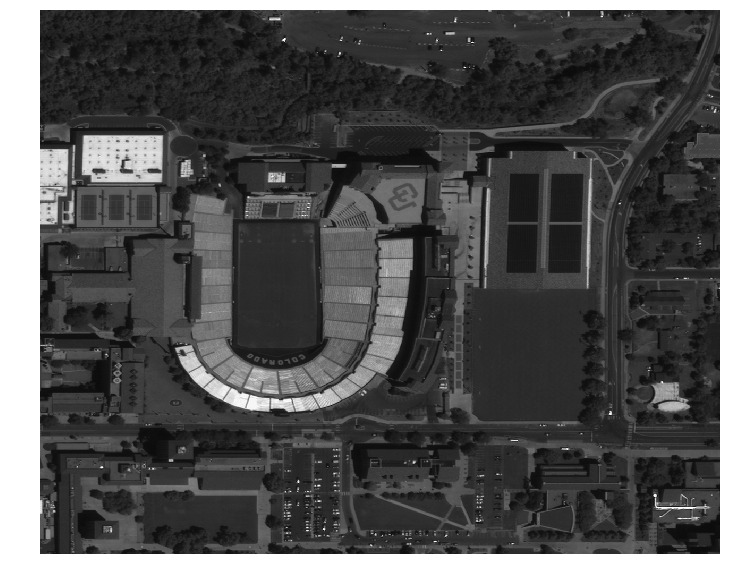

In [9]:
plot_pan(aoi)

In [10]:
cat_id = '1030010059784E00'
bounds = [-105.26801347732545,40.00817393602954,-105.26406526565553,40.01108296862613]
img = gbdx.image(cat_id)
aoi = img.aoi(bounds, image_type='pansharpened')
print aoi.shape

(8, 1024, 1280)


In [11]:
sharpened = aoi[[4,2,1], ...]
s = sharpened.compute()

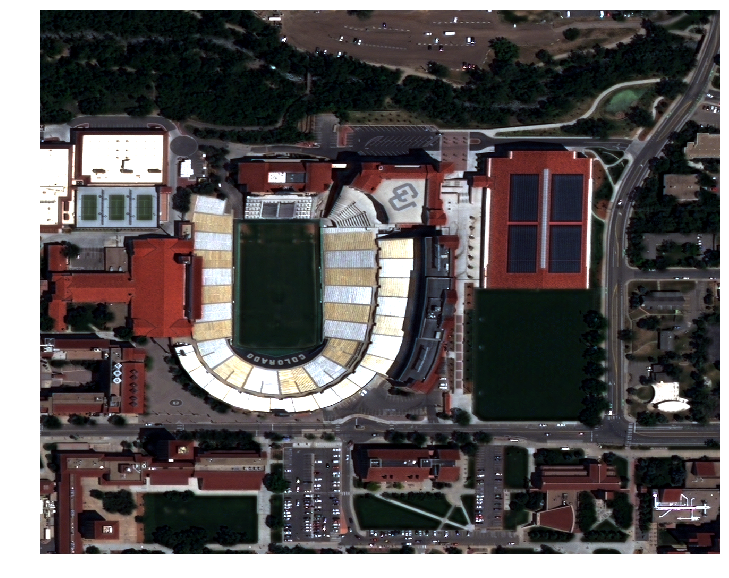

In [12]:
plot(s, stretch=[2,96])

In [ ]:
# TODO 

1. Fix geotiff, add projection? 
2. Spec out panchromatic 
    from catid: img.aoi(bounds, image_type='PAN|MS|Panchromatic', acomp=True|False, projection="+proj=utm etc")
3. Multiple Idaho ids support? 
4. Spec out gbdxtool task simplification